# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [14]:
df_all = pd.read_csv("data_allrounds_activitybinary.csv", sep=";")
df_all.head()

,round,sample,ID_plate,centroid_1,centroid_2,growth_rate,peaks,circularity,eccentricity,RGB_mean_1,...,Labt_mean_1,Labt_mean_2,Labt_mean_3,Labt_std_1,Labt_std_2,Labt_std_3,activity_total,activity_gram_p,activity_gram_n,activity_fungi
0,1,10µl-nr1,1-1,835,1242,"0,1338005",23,"0,96578","0,18561","246,7854",...,"91,3267","6,5164","7,15765","10,7217","4,70734","7,27739",1,1,1,0
1,1,10µl-nr1,1-2,1484,1109,"0,063329023",13,"1,0207","0,22453","203,4753",...,"69,7232","14,1296","19,6061","4,13404","3,4022","3,81545",0,0,0,0
2,1,10µl-nr2,2-2,493,580,"0,04584244",15,"1,0581","0,28171","207,9126",...,"71,3072","19,8785","15,035","7,10437","5,2638","3,69122",0,0,0,0
3,1,10µl-nr2,2-4,1052,1305,"0,656070866",9,"1,0217","0,44729","186,424",...,"65,0318","13,5466","13,9261","2,10122","2,40051","3,14126",0,0,0,0
4,1,10µl-nr2,2-5,1146,808,"0,053184523",22,"0,98664","0,25451","234,9079",...,"76,051","25,1306","20,0857","6,40666","4,69942","3,93355",0,0,0,0


### Data preparation

In [15]:
#Clean column names
df_all.columns = df_all.columns.str.lower().str.replace(' ', '_')
df_all.columns

Index(['round', 'sample', 'id_plate', 'centroid_1', 'centroid_2',
       'growth_rate', 'peaks', 'circularity', 'eccentricity', 'rgb_mean_1',
       'rgbt_mean_2', 'rgbt_mean_3', 'rgbt_std_1', 'rgbt_std_2', 'rgbt_std_3',
       'lab_mean_1', 'lab_mean_2', 'lab_mean_3', 'lab_std_1', 'lab_std_2',
       'lab_std_3', 'labt_mean_1', 'labt_mean_2', 'labt_mean_3', 'labt_std_1',
       'labt_std_2', 'labt_std_3', 'activity_total', 'activity_gram_p',
       'activity_gram_n', 'activity_fungi'],
      dtype='object')

In [16]:
df_all.dtypes

round               int64
sample             object
id_plate           object
centroid_1          int64
centroid_2          int64
growth_rate        object
peaks               int64
circularity        object
eccentricity       object
rgb_mean_1         object
rgbt_mean_2        object
rgbt_mean_3        object
rgbt_std_1         object
rgbt_std_2         object
rgbt_std_3         object
lab_mean_1         object
lab_mean_2         object
lab_mean_3         object
lab_std_1          object
lab_std_2          object
lab_std_3          object
labt_mean_1        object
labt_mean_2        object
labt_mean_3        object
labt_std_1         object
labt_std_2         object
labt_std_3         object
activity_total      int64
activity_gram_p     int64
activity_gram_n     int64
activity_fungi      int64
dtype: object

In [17]:
np.mean(df_all.isnull().sum())


np.float64(0.0)

### Exploratory data analysis

In [18]:
for col in df_all.columns:
    print(col)
    print(df_all[col].unique()[:5])
    print(df_all[col].nunique()) #number of unique values
    print('---')

round
[1 2]
2
---
sample
['10µl-nr1' '10µl-nr2' '10µl-nr3' '10µl-nr4' '10µl-nr5']
51
---
id_plate
['1-1' '1-2' '2-2' '2-4' '2-5']
383
---
centroid_1
[ 835 1484  493 1052 1146]
390
---
centroid_2
[1242 1109  580 1305  808]
398
---
growth_rate
['0,1338005' '0,063329023' '0,04584244' '0,656070866' '0,053184523']
362
---
peaks
[23 13 15  9 22]
25
---
circularity
['0,96578' '1,0207' '1,0581' '1,0217' '0,98664']
432
---
eccentricity
['0,18561' '0,22453' '0,28171' '0,44729' '0,25451']
451
---
rgb_mean_1
['246,7854' '203,4753' '207,9126' '186,424' '234,9079']
453
---
rgbt_mean_2
['225,925' '160,3111' '160,9032' '148,5897' '169,5041']
451
---
rgbt_mean_3
['217,3063' '135,6222' '148,3548' '133,641' '151,9421']
453
---
rgbt_std_1
['22,9483' '16,0928' '28,7998' '7,89643' '21,5408']
453
---
rgbt_std_2
['31,6416' '10,0833' '15,8332' '5,8387' '17,2004']
453
---
rgbt_std_3
['36,2281' '7,72625' '13,2729' '5,50831' '16,3168']
453
---
lab_mean_1
['89,0539' '69,1886' '69,2019' '64,0392' '75,2906']
453
---

<Axes: xlabel='activity_total', ylabel='Count'>

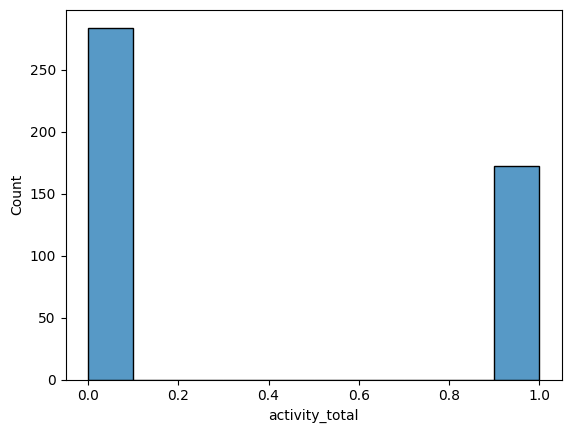

In [19]:
sns.histplot(df_all['activity_total'])

### Split data

In [22]:
df = df_all.iloc[:,3:28].copy()
df.head()

,centroid_1,centroid_2,growth_rate,peaks,circularity,eccentricity,rgb_mean_1,rgbt_mean_2,rgbt_mean_3,rgbt_std_1,...,lab_std_1,lab_std_2,lab_std_3,labt_mean_1,labt_mean_2,labt_mean_3,labt_std_1,labt_std_2,labt_std_3,activity_total
0,835,1242,"0,1338005",23,"0,96578","0,18561","246,7854","225,925","217,3063","22,9483",...,"11,1602","6,90168","8,14749","91,3267","6,5164","7,15765","10,7217","4,70734","7,27739",1
1,1484,1109,"0,063329023",13,"1,0207","0,22453","203,4753","160,3111","135,6222","16,0928",...,"5,09732","3,40151","4,86611","69,7232","14,1296","19,6061","4,13404","3,4022","3,81545",0
2,493,580,"0,04584244",15,"1,0581","0,28171","207,9126","160,9032","148,3548","28,7998",...,"7,38965","5,17052","3,67209","71,3072","19,8785","15,035","7,10437","5,2638","3,69122",0
3,1052,1305,"0,656070866",9,"1,0217","0,44729","186,424","148,5897","133,641","7,89643",...,"3,66983","2,71661","3,49231","65,0318","13,5466","13,9261","2,10122","2,40051","3,14126",0
4,1146,808,"0,053184523",22,"0,98664","0,25451","234,9079","169,5041","151,9421","21,5408",...,"10,3683","7,04636","6,18122","76,051","25,1306","20,0857","6,40666","4,69942","3,93355",0


In [23]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [24]:
print(df_train.shape, df_val.shape, df_test.shape)

(273, 25) (91, 25) (92, 25)


In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# turn target value into binary
y_train = df_train.activity_total.astype('int').values
y_val = df_val.activity_total.astype('int').values
y_test = df_test.activity_total.astype('int').values

del df_train['activity_total']
del df_val['activity_total']2
del df_test['activity_total']